# IntroStat Week 6

Welcome to the 6th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 6.


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

### Example: Nutrition study 1

First visualise the data :)

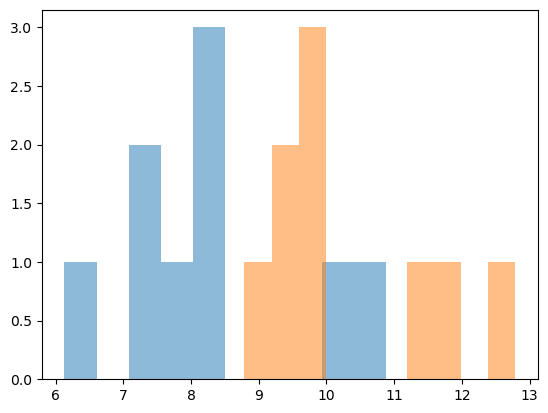

In [53]:
# Enter data
A = np.array([7.53, 7.48, 8.08, 8.09, 10.15, 8.40, 10.88, 6.13, 7.90])
B = np.array([9.21, 11.51, 12.79, 11.85, 9.97, 8.79, 9.69, 9.68, 9.19])

# Plotting histograms together
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.show()

Lets calculate mean and sample standard deviation for each group

In [54]:
mean_A = A.mean()
mean_B = B.mean()
print([mean_A, mean_B])

s_A = A.std(ddof=1)
s_B = B.std(ddof=1)
print([s_A, s_B])

[8.293333333333335, 10.297777777777776]
[1.4280756282494287, 1.3978713976773558]


The mean energy use in hospital B is higher than hospital. Is the mean difference statistically significant?

We can plot the mean values as well

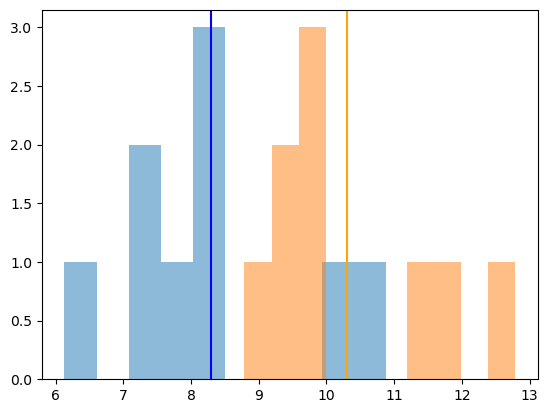

In [55]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
# Lines with means
plt.axvline(mean_A, linestyle='-', color="blue", ymin=0, ymax=1)
plt.axvline(mean_B, linestyle='-', color="orange", ymin=0, ymax=1)

plt.show()

Great!
But are they the same?

What else can we do?

lets calculate standard error (se) for each group mean and add the confidence intervals 

In [56]:
n_A = len(A) 
n_B = len(B)
# Standard errors
se_A = s_A/np.sqrt(n_A)
se_B = s_B/np.sqrt(n_B)
print([se_A, se_B])

[0.47602520941647625, 0.4659571325591186]


In [57]:
# Need to choose alpha - we choose alpha = 0.05 
t_0975 = stats.t.ppf(0.975, df=n_A-1) # same for B since n_A = n_B

# Confidence intervals [lower, upper]
CI_A = [mean_A - t_0975 * se_A, mean_A + t_0975 * se_A]
CI_B = [mean_B - t_0975 * se_B, mean_B + t_0975 * se_B]
print(CI_A)
print(CI_B)

[7.195617232038814, 9.391049434627854]
[9.223278703348157, 11.372276852207396]


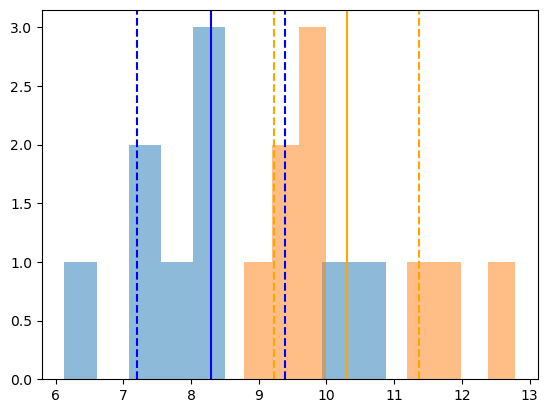

In [58]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.axvline(mean_A, linestyle='-', color="blue", ymin=0, ymax=1)
plt.axvline(mean_B, linestyle='-', color="orange", ymin=0, ymax=1)
# Adding confidence intervals to the plot from earlier
plt.axvline(CI_A[0], linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(CI_A[1], linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(CI_B[0], linestyle='--', color="orange", ymin=0, ymax=1)
plt.axvline(CI_B[1], linestyle='--', color="orange", ymin=0, ymax=1)

plt.show()

Another typical way to plot (only mean and CI):

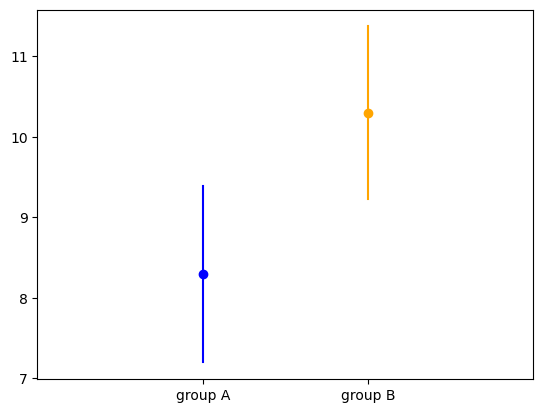

In [59]:
plt.plot([1], mean_A, 'o', color="blue")
plt.plot([2], mean_B, 'o', color="orange")
plt.plot([1,1], CI_A, linestyle='-', color="blue")
plt.plot([2,2], CI_B, linestyle='-', color="orange")
plt.xlim([0,3])
plt.xticks([1,2], ["group A", "group B"])

plt.show()

### Example: Nutrition study 2: (Welch) t-test with two independent and unpaired samples
Step by step (Welch) t-test with two independent and unpaired samples

In [60]:
# Difference in means
diff = mean_B - mean_A
print(diff)

2.0044444444444416


In [61]:
# Standard error of the difference
se_diff = np.sqrt(se_A**2 + se_B**2)
print(se_diff)

0.6661201463570338


In [62]:
# Define the null hypothesis
mean_null_hyp = 0

In [63]:
# Compute the "test statistic" from the oberserved data
tobs = (diff - mean_null_hyp) / se_diff
print(tobs)

3.009133495521211


#### Standard Error
$ SE = \frac{s}{\sqrt{n}}$ <br>
$ SE^2 = \frac{s^2}{n}$

#### v degrees of freedom for Welch t-test (with two normally distributed population or sufficiently large sample sizes)

$ v = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}$<br>
$ v = \frac{\left( \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B} \right)^2}{\frac{\left( \frac{s_A^2}{n_A} \right)^2}{n_A - 1} + \frac{\left( \frac{s_B^2}{n_B} \right)^2}{n_B - 1}}$


In [64]:
# compute v (degrees of freedom for difference-test)
v = (se_A**2 + se_B**2)**2 / (se_A**4/(n_A-1) + se_B**4/(n_B-1))
print(v)

15.992693827602638


In [65]:
# Compute t_0.975 from t-distribution with df = v
stats.t.ppf(0.975, df=v)

2.119984011855833

In [66]:
# P-value
print(2*stats.t.cdf(-tobs, df=v))
# or
print(2*(1 - stats.t.cdf(tobs, df=v)))

0.008322739957316144
0.008322739957316028


#### ttest_ind function from scipy.stats for two independent samples

In [67]:
# You can also use the ttest_ind function from scipy.stats:
# "_ind" is for independent - i.e., two independent samples
test = stats.ttest_ind(B,A,equal_var=False) 
# "equal_var=False" means we are NOT assuming equal variances - this is a "Welch t-test"
print(test)

Ttest_indResult(statistic=3.009133495521211, pvalue=0.00832273995731614)


Since 0.001 < p < 0.01 we conclude there is "Strong evidence against H_0"

We reject the nullhypothesis

And we conclude that the average energy usage of nurses in Hospital B is significantly larger than in Hospital A. 

### Example: Nutrition study 3:

Confidence interval for the difference in means:

In [68]:
# [lower, upper] confidence interval for the difference
diff_lower = diff - stats.t.ppf(0.975, df=v)*se_diff
diff_upper = diff + stats.t.ppf(0.975, df=v)*se_diff
print([diff_lower,diff_upper])

[0.5922803841924627, 3.4166085046964207]


In [69]:
# You can also retrieve the confidence interval from the "test" calculated with stats.ttest_ind:
test = stats.ttest_ind(B,A,equal_var=False) 
print(test.confidence_interval(0.95))

AttributeError: 'Ttest_indResult' object has no attribute 'confidence_interval'

The confidence interval does not include the value 0.

### Example: Sleep medicine (paired t-test):

In [91]:
x1 = np.array([.7,-1.6,-.2,-1.2,-1,3.4,3.7,.8,0,2])
x2 = np.array([1.9,.8,1.1,.1,-.1,4.4,5.5,1.6,4.6,3.4])

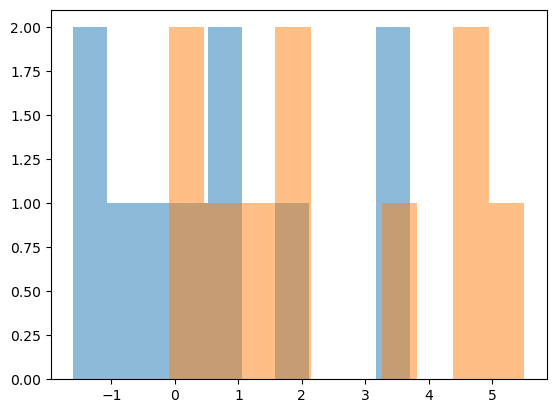

In [92]:
plt.hist(x1, alpha=0.5)
plt.hist(x2, alpha=0.5)
plt.show()

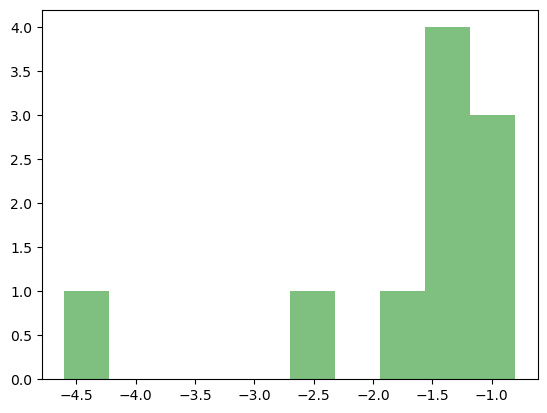

In [93]:
differences = x1-x2
plt.hist(differences, alpha=0.5, color = "green")
plt.show()

#### "one sample t-test" for the differences: stats.ttest_1samp()

In [96]:
# make a "one sample t-test" for the differences (this time we only use the built-in python function):
test1 = stats.ttest_1samp(differences, popmean=0)
print(test1)
print(test1.confidence_interval(0.95))

TtestResult(statistic=-4.671645978656774, pvalue=0.0011658764685528319, df=9)
ConfidenceInterval(low=-2.4786662557558947, high=-0.8613337442441052)


#### Paired t-test for two related samples: stats.ttest_rel(x1, x2)

In [74]:
# equal to a paired t-test for two samples:
test2 = stats.ttest_rel(x1, x2) # "_rel" is for related samples (= paired samples)
print(test2)
print(test2.confidence_interval(0.95))

TtestResult(statistic=-4.671645978656774, pvalue=0.0011658764685528319, df=9)
ConfidenceInterval(low=-2.4786662557558947, high=-0.8613337442441052)


#### t-test for two independent samples: stats.ttest_ind(x1,x2)

In [75]:
# WRONG ANALYSIS: In the case of Sleep medication data
test3 = stats.ttest_ind(x1, x2) # making independent 2 sample test - WRONG!
print(test3)
print(test3.confidence_interval(0.99))

Ttest_indResult(statistic=-1.9334408348617205, pvalue=0.06906688754589858)


AttributeError: 'Ttest_indResult' object has no attribute 'confidence_interval'

A paired experiment is "stronger" than an unpaired experiment. 

In a paired experiment each person is its owm "negative control" and we are sure to meassure a difference that is not due to inter-personal variation. 

### QQ-plots

Lets re-visit the example with energy usage amongst nurses in hospital A and hospital B

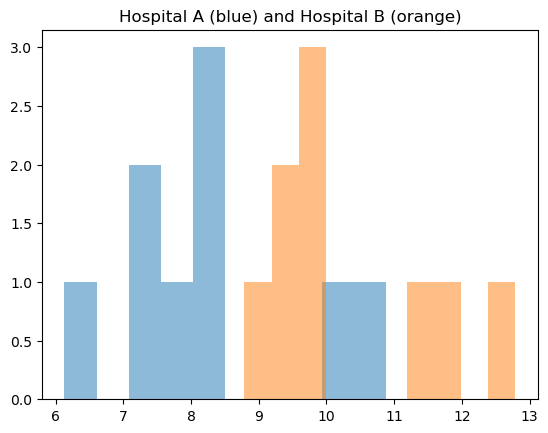

In [76]:
A = np.array([7.53, 7.48, 8.08, 8.09, 10.15, 8.40, 10.88, 6.13, 7.90])
B = np.array([9.21, 11.51, 12.79, 11.85, 9.97, 8.79, 9.69, 9.68, 9.19])

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.title("Hospital A (blue) and Hospital B (orange)")
plt.show()

Could the data come from underlying normal distributions?

Do we need to assume that the distributions are normal?

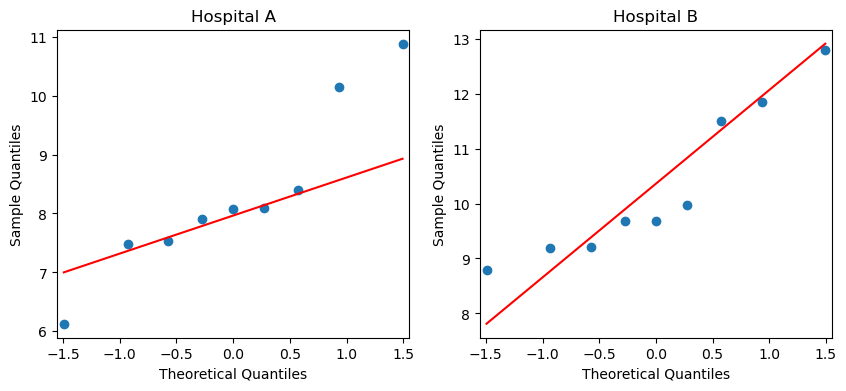

In [77]:
# Lets make the QQ-plots:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sm.qqplot(A,line="q",a=3/8,ax=axs[0]) 
sm.qqplot(B,line="q",a=3/8,ax=axs[1]) 
# OBS: "a = 3/8" is preferred for n <= 10 
#     ("a = 1/2" is preferred for n >  10)  
axs[0].set_title("Hospital A")
axs[1].set_title("Hospital B")
plt.show()


Its difficult to tell whether it looks normal

We can try to compare with simulated data from normal distributions
- This is a so-called "Wally-plot"

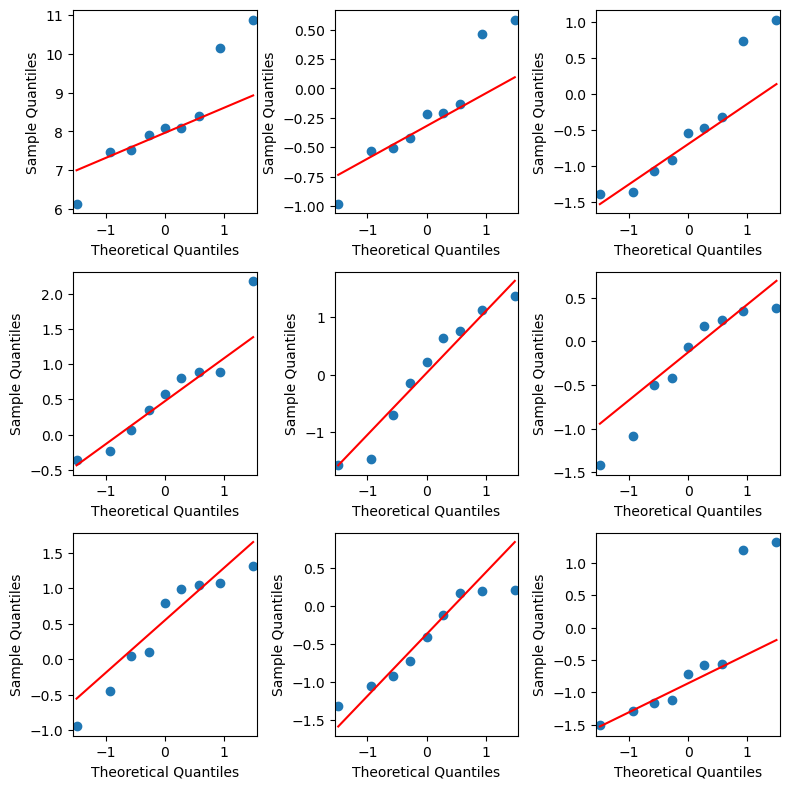

In [78]:
# for Hospital A
fig, axs = plt.subplots(3, 3, figsize=(8,8))
# data in first subplot:
sm.qqplot(A,line="q",a=3/8,ax=axs[0,0]) 
# simulated data in all other subplots:
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[0,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[0,2]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,0]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[1,2]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,0]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,1]) 
sm.qqplot(stats.norm.rvs(size=len(A)),line="q",a=3/8,ax=axs[2,2]) 
plt.tight_layout()
plt.show()

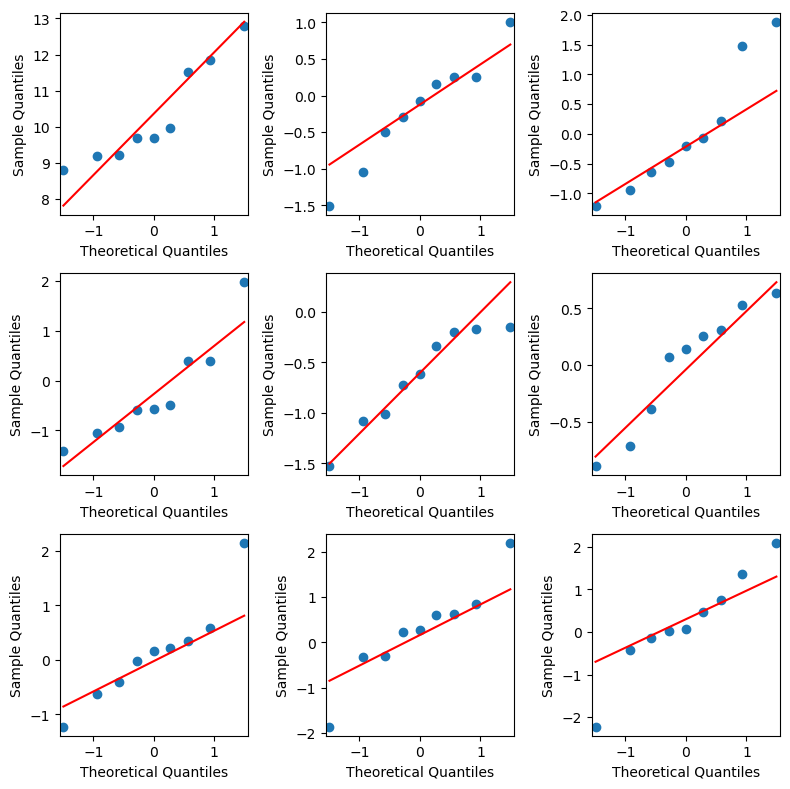

In [79]:
# for Hospital B
fig, axs = plt.subplots(3, 3, figsize=(8,8))
# data in first subplot:
sm.qqplot(B,line="q",a=3/8,ax=axs[0,0]) 
# simulated data in all other subplots:
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[0,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[0,2]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,0]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[1,2]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,0]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,1]) 
sm.qqplot(stats.norm.rvs(size=len(B)),line="q",a=3/8,ax=axs[2,2]) 
plt.tight_layout()
plt.show()

When comparing to simulated data, it looks like our data could very well come from an underlying normal distribution.

This is no proof of normality(!), but it can give us an idea whether the assumption could be true.

### Example: Power calculations

In [80]:
# import package for power calculations:
import statsmodels.stats.power as smp

In [81]:
# We want to calculate the sample size needed in a new experiment

# from previous experiments we have a good guess for the sample variation:
sd = 1.62

# we want to be able to detect a voltage drop of down to 0.5 volts
delta = 0.5

# we need some fractals from the normal distribution (assuming the samples will be big enough for normal distribution assumption to apply)
z_power = stats.norm.ppf(0.80, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

# use formula to calculate n_obs (needed number of observations):
n_obs = (sd/delta*(z_power+z_signif))**2
print(n_obs)

82.394399899303


In [82]:
# we can also use the python function TTestPower().solve_power (for one sample power calculations): 
print(smp.TTestPower().solve_power(effect_size=delta/sd, alpha=0.05, power=0.80))

84.33509228908557


The results is almost the same (due to assumption anout normal distribution)

In [83]:
# What if we can only make 60 observations?
n = 60

# calculate the power:
z_power_new = np.sqrt(n*(delta/sd)**2)-z_signif
print(z_power_new)

power = stats.norm.cdf(z_power_new)
print(power)

0.43076647608180796
0.6666809112171673


In [84]:
# we can also use the python function TTestPower().solve_power (for one sample power calculations): 
print(smp.TTestPower().solve_power(effect_size=delta/sd, alpha=0.05, nobs=60))

0.6523725334484215


The result is almost the same (due to assumption about normaldistribution)

### Example: Power calculations, 2 samples

#### 1)

Find the sample size in a test where:

power = 0.90 (beta = 0.10)

n1 = n2 (k = 1)

We want to be able to detect a difference of 2

using alpha = 0.05

and assuming sigma = 1 in both populations

In [85]:
power = 0.90
k = 1
delta = 2
sd = 1

z_power = stats.norm.ppf(0.90, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

n1 = (k+1) * (sd/delta*(z_signif+z_power))**2

print(n1)

5.2537115307203095


In [86]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(effect_size=delta/sd, alpha=0.05, power=0.90, ratio=k))

6.386755384175021


The result is almost the same (due to assumption anout normaldistribution)

#### 2)

Find the power of an experiment where: 

n1 = n2 = 10  (k = 1)

We want to be able to detect a difference of 2

using alpha = 0.05

and assuming sigma = 1 in both populations

In [87]:
n1 = 10
n2 = 10
k = 1
delta = 2
sd = 1
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

z = np.sqrt(n1/(k+1)*delta**2/sd**2) - z_signif
power = stats.norm.cdf(z)

print(power)

0.9940004699860238


In [88]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(effect_size=delta/sd, alpha=0.05, nobs1=10, ratio=k))

0.9881789691948746


The result is almost the same (due to assumption anout normaldistribution)

#### 3)

What effectsize (delta) can be detected when:

n1 = n2 = 10  (k = 1)

alpha = 0.05

power = 0.90 (beta = 0.10)

and assuming sigma = 1 in both populations

In [89]:
n1 = 10
n2 = 10
k = 1
sd = 1

z_power = stats.norm.ppf(0.90, loc=0, scale = 1)
z_signif = stats.norm.ppf(0.975, loc=0, scale = 1)

delta = sd*(z_signif+z_power)/np.sqrt(n1/(k+1))

print(delta)

1.4496498240223823


In [90]:
# we can also use the python function TTestIndPower().solve_power (for one sample power calculations): 
print(smp.TTestIndPower().solve_power(alpha=0.05, power=0.90, nobs1=10, ratio=k))

1.5336931237722102
